In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def get_df(filename):
    df = pd.read_csv(filename)
    df = df[['k', 'size', 'timing']]
    return df

def plot(df, fit=False):
    plt.figure()
    for i in range(1, 11):
        da = df[df['k'] == i]
        x = da['size']
        y = da['timing']
        if fit:
            z = np.polyfit(x, y, 3)
            f = np.poly1d(z)
            y = [f(_x) for _x in x]
        plt.plot(x, y, label=f'k={i}')
    plt.legend(loc='upper left')
    title = f'Running time vs data set size vs k'
    if fit:
        title += ' (fit)'
    plt.title(title)
    plt.xlabel('size')
    plt.ylabel('seconds')

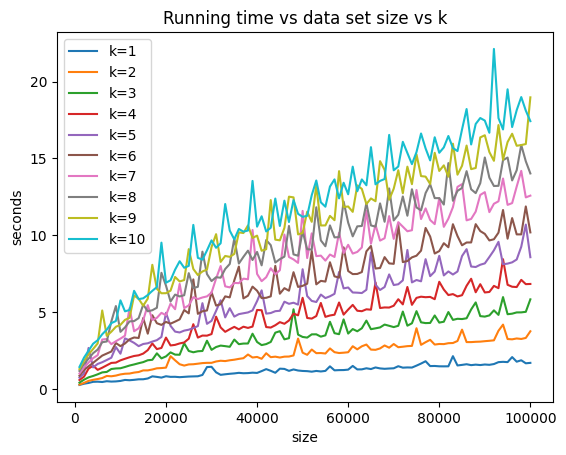

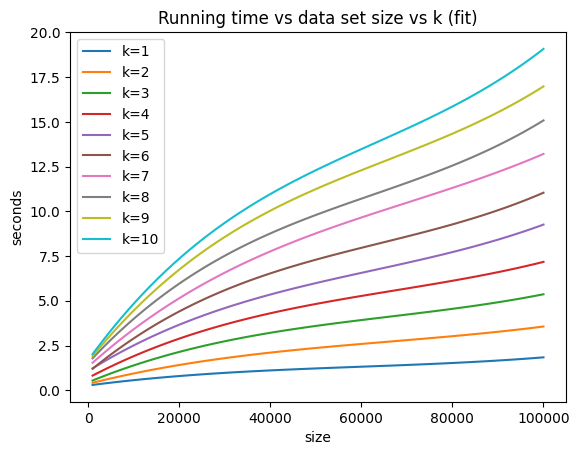

In [3]:
dfa = get_df('timings_v2k_old.csv')
plot(dfa)
plot(dfa, True)

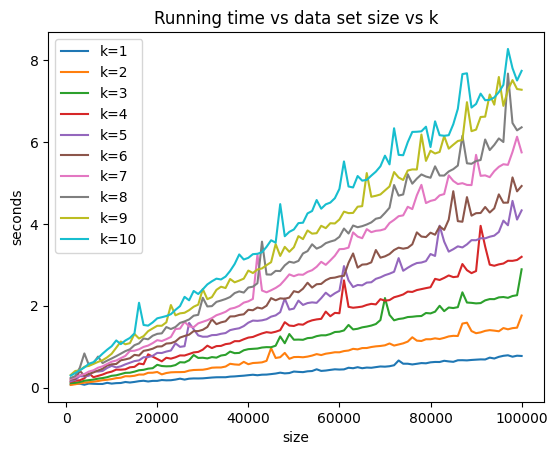

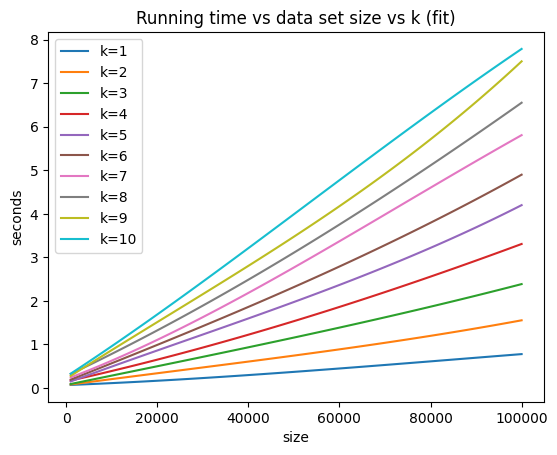

In [4]:
dfb = get_df('timings_v2k.csv')
plot(dfb)
plot(dfb, True)

## Runtime ratio

In [5]:
dfa[['timing']] = dfa[['timing']] / dfb[['timing']]
df = dfa[['k', 'size', 'timing']]
df.head()

,k,size,timing
0,1,1000,3.497365
1,1,2000,3.689225
2,1,3000,4.226566
3,1,4000,6.876162
4,1,5000,4.893333


In [6]:
def polyfit(x, y, deg):
    z = np.polyfit(x, y, deg)
    f = np.poly1d(z)
    y_ = [f(_x) for _x in x]
    return y_

def plot(fit=False):
    for i in range(1, 11):
        da = df[df['k'] == i]
        x = da['size']
        y = da['timing']
        if fit:
            y = polyfit(x, y, 3)
        plt.plot(x, y, label=f'k={i}')
    plt.legend(loc='upper right')
    plt.title(f'Running time ratio (old / new)')
    plt.xlabel('size')
    plt.ylabel('ratio (old / new)')

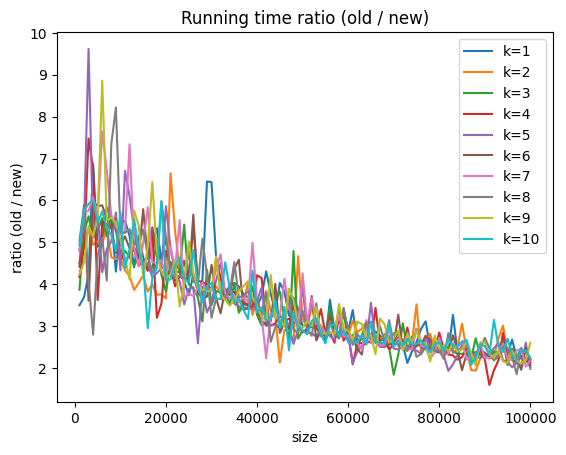

In [7]:
plot()

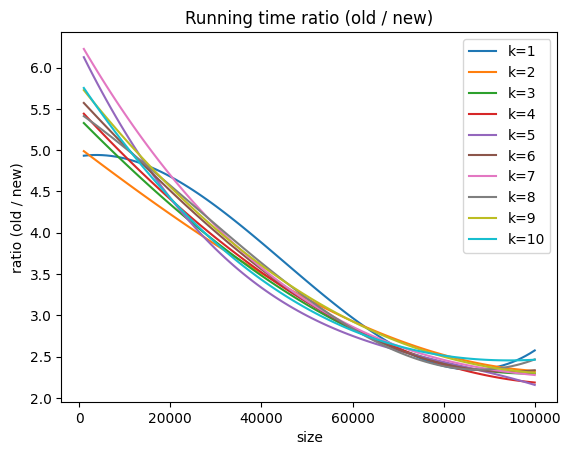

In [8]:
plot(True)

Text(0, 0.5, 'ratio (old / new)')

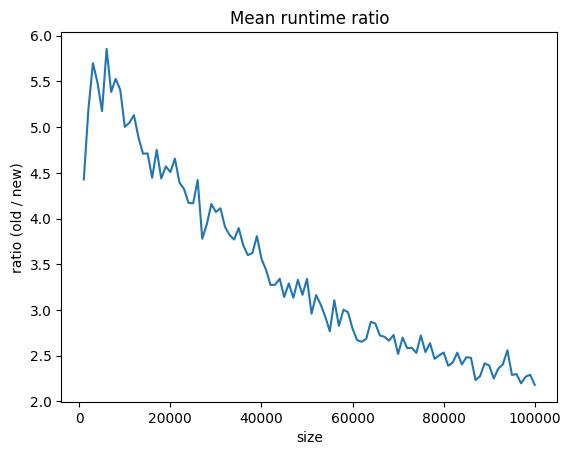

In [9]:
x = df['timing'].groupby(df['size']).mean()

plt.title('Mean runtime ratio')
plt.plot(x)
plt.xlabel('size')
plt.ylabel('ratio (old / new)')

Text(0, 0.5, 'ratio (old / new)')

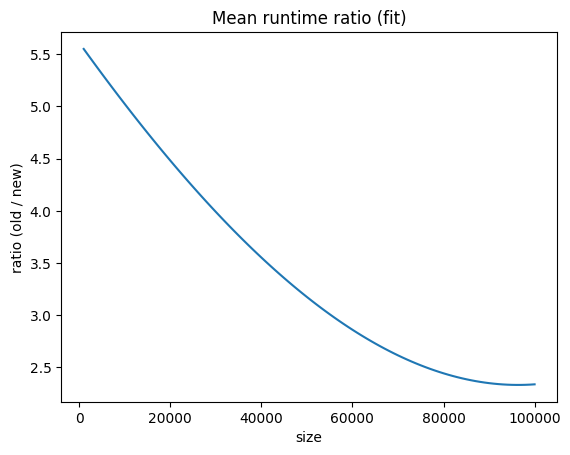

In [10]:
y = x.values
x = x.keys().values
y = polyfit(x, y, 3)

plt.title('Mean runtime ratio (fit)')
plt.plot(x, y)
plt.xlabel('size')
plt.ylabel('ratio (old / new)')

## Experiment 2

In [11]:
def get_df(filename):
    df = pd.read_csv(filename)
    df = df[['k', 'size', 'timing', 'circles']]
    return df


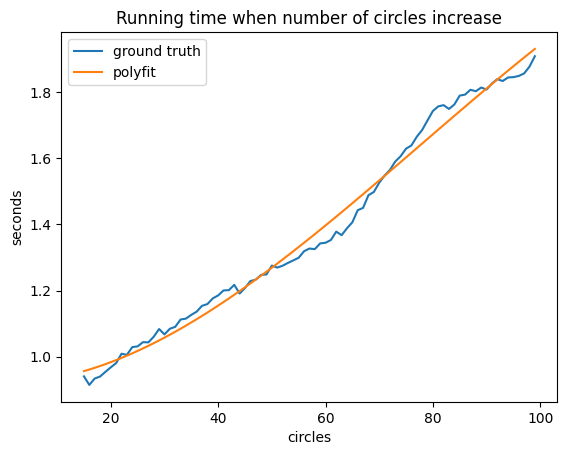

In [13]:
df = get_df('experiment2.csv')

df = df.groupby(['circles']).mean()
x = df.index
y = df['timing']
plt.plot(x, y, label='ground truth')
y = polyfit(x, y, 3)

plt.plot(x, y, label='polyfit')
plt.title(f'Running time when number of circles increase')
plt.xlabel('circles')
plt.ylabel('seconds')
plt.legend();

# Experiment 3

Text(0, 0.5, 'seconds')

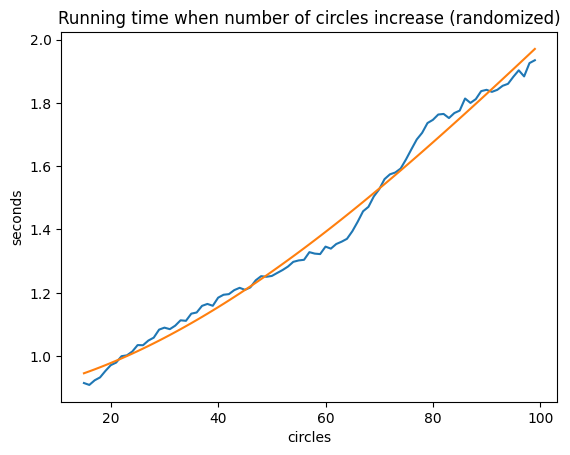

In [14]:
df = get_df('experiment3.csv')

df = df.groupby(['circles']).mean()
x = df.index
y = df['timing']
plt.plot(x, y, label='ground truth')
y = polyfit(x, y, 3)
plt.plot(x, y, label='polyfit')
plt.title(f'Running time when number of circles increase (randomized)')
plt.xlabel('circles')
plt.ylabel('seconds')

# Experiment 4

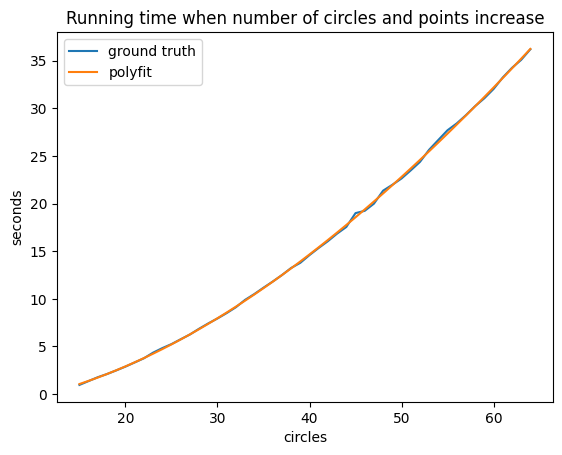

In [15]:
df = get_df('experiment4.csv')
df = df.groupby(['circles']).mean()
x = df.index
y = df['timing']

# plt.plot(df['size'], df['timing'])
# plt.title(f'Running time when number of circles and points increase')
# plt.xlabel('points')
# plt.ylabel('seconds')

plt.plot(x, y, label='ground truth')
y = polyfit(x, y, 3)

plt.plot(x, y, label='polyfit')
plt.title(f'Running time when number of circles and points increase')
plt.xlabel('circles')
plt.ylabel('seconds')
plt.legend();